In [2]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [4]:
## Getting the first few rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(f"{data.columns[0]} is not so used")
print(f"{data.columns[1]} is Nominal")
print(f"{data.columns[2]} is Nominal")
print(f"{data.columns[3]} is Ordinal")
print(f"{data.columns[4]} is Nominal")
print(f"{data.columns[5]} is Nominal")
print(f"{data.columns[6]} is Discrete")
print(f"{data.columns[7]} is Continuous")
print(f"{data.columns[8]} is Continuous")
print(f"{data.columns[9]} is Discrete")
print(f"{data.columns[10]} is Discrete")
print(f"{data.columns[11]} is Nominal")
print(f"{data.columns[12]} is Nominal")

Loan_ID is not so used
Gender is Nominal
Married is Nominal
Dependents is Ordinal
Education is Nominal
Self_Employed is Nominal
ApplicantIncome is Discrete
CoapplicantIncome is Continuous
LoanAmount is Continuous
Loan_Amount_Term is Discrete
Credit_History is Discrete
Property_Area is Nominal
Loan_Status (Approved) is Nominal


In [6]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

# Domian analysis.
## Basic Checks

In [8]:
# head,tail,info,describe for both numerical and categorical
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling missing values

In [11]:
for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]) :
        data[i] = data[i].fillna(data[i].mean())
    else:
        data[i] = data[i].fillna(data[i].mode().iloc[0])
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [12]:
# Loan Amount
print("Skewness of Loan Amount: ", data['LoanAmount'].skew())
print("Kurtosis of Loan Amount: ", data['LoanAmount'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")

Skewness of Loan Amount:  2.726601144105299
Kurtosis of Loan Amount:  10.896456468091559
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3


In [13]:
# CoApplicant Income
print("Skewness of CoApplicant Income: ", data['CoapplicantIncome'].skew())
print("Kurtosis of CoApplicant Income: ", data['CoapplicantIncome'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")

Skewness of CoApplicant Income:  7.491531216657306
Kurtosis of CoApplicant Income:  84.95638421103374
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3


In [14]:
# Applicant Income
print("Skewness of Applicant Income: ", data['ApplicantIncome'].skew())
print("Kurtosis of Applicant Income: ", data['ApplicantIncome'].kurt())
print("Skewness of Applicant Income not acceptable as highly skewed")
print("Applicant Income is leptokurtic as kurtosis >3")
print("Applicant Income is not Normally distributed")

Skewness of Applicant Income:  6.539513113994625
Kurtosis of Applicant Income:  60.54067593369113
Skewness of Applicant Income not acceptable as highly skewed
Applicant Income is leptokurtic as kurtosis >3
Applicant Income is not Normally distributed


In [15]:
# one hot encoding
df1= pd.get_dummies(data['Gender'],prefix='Gender',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [16]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,True
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,True
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,True
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,True
4,LP001008,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,False
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,True
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,True
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,True


In [17]:
data.isnull().sum()

Loan_ID                   0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
Gender_Male               0
dtype: int64

In [18]:
df2= pd.get_dummies(data['Married'],prefix='Married',drop_first=True)
data=pd.concat([data,df2],axis=1).drop(['Married'],axis=1)

In [19]:
df3= pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True)
data=pd.concat([data,df3],axis=1).drop(['Dependents'],axis=1)

In [20]:
df4= pd.get_dummies(data['Education'],prefix='Education',drop_first=True)
data=pd.concat([data,df4],axis=1).drop(['Education'],axis=1)

In [21]:
df5= pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data=pd.concat([data,df5],axis=1).drop(['Property_Area'],axis=1)

In [22]:
data

,Loan_ID,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,No,5849,0.0,146.412162,360.0,1.0,Y,True,False,False,False,False,False,False,True
1,LP001003,No,4583,1508.0,128.000000,360.0,1.0,N,True,True,True,False,False,False,False,False
2,LP001005,Yes,3000,0.0,66.000000,360.0,1.0,Y,True,True,False,False,False,False,False,True
3,LP001006,No,2583,2358.0,120.000000,360.0,1.0,Y,True,True,False,False,False,True,False,True
4,LP001008,No,6000,0.0,141.000000,360.0,1.0,Y,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,2900,0.0,71.000000,360.0,1.0,Y,False,False,False,False,False,False,False,False
610,LP002979,No,4106,0.0,40.000000,180.0,1.0,Y,True,True,False,False,True,False,False,False
611,LP002983,No,8072,240.0,253.000000,360.0,1.0,Y,True,True,True,False,False,False,False,True
612,LP002984,No,7583,0.0,187.000000,360.0,1.0,Y,True,True,False,True,False,False,False,True


In [23]:
print(len(data.columns))

16


In [24]:
df6= pd.get_dummies(data['Self_Employed'],prefix='Self_Employed',drop_first=True)
data=pd.concat([data,df6],axis=1).drop(['Self_Employed'],axis=1)

In [25]:
df7= pd.get_dummies(data['Loan_Status (Approved)'],prefix='Loan_Status (Approved)',drop_first=True)
data=pd.concat([data,df7],axis=1).drop(['Loan_Status (Approved)'],axis=1)

In [26]:
print(len(data.columns))

16


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")

In [28]:
la_shape = pt.fit_transform(data[['LoanAmount']])
la_shape.shape

(614, 1)

In [29]:
print("Skewness: ",pd.Series(la_shape.reshape(614,)).skew())
print("Skewness: ",pd.Series(la_shape.reshape(614,)).kurtosis())

Skewness:  0.024376135751782733
Skewness:  2.3999414421592773


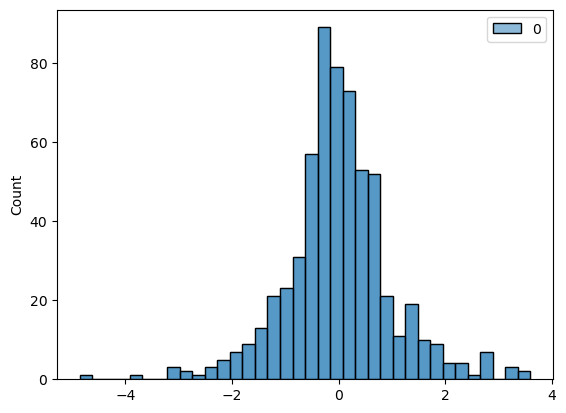

In [31]:
sns.histplot(la_shape)
plt.show()

In [32]:
la_shape_2 = pt.fit_transform(data[['ApplicantIncome']])
la_shape_2.shape

(614, 1)

In [34]:
print("Skewness: ",pd.Series(la_shape_2.reshape(614,)).skew())
print("kurtosis: ",pd.Series(la_shape_2.reshape(614,)).kurtosis())

Skewness:  -0.09294567889276603
kurtosis:  4.77062663426899


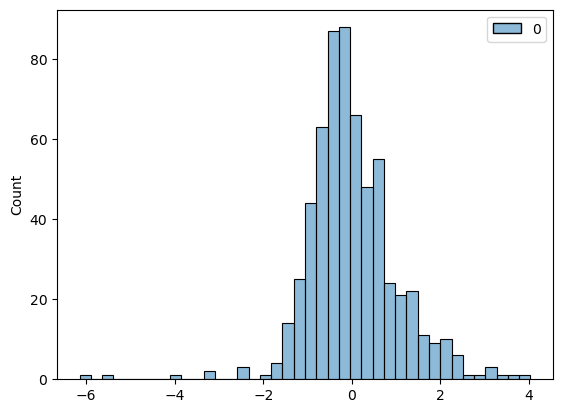

In [35]:
sns.histplot(la_shape_2)
plt.show()